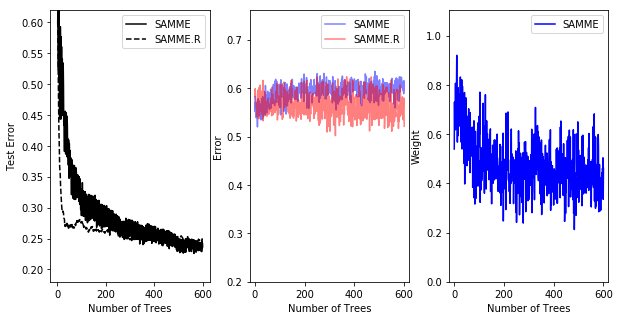

In [2]:
from sklearn.externals.six.moves import zip

import matplotlib.pyplot as plt

from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


X, y = make_gaussian_quantiles(n_samples=13000, n_features=10,
                               n_classes=3, random_state=1)

n_split = 3000

X_train, X_test = X[:n_split], X[n_split:]
y_train, y_test = y[:n_split], y[n_split:]

bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)

real_test_errors = []
discrete_test_errors = []

for real_test_predict, discrete_train_predict in zip(
        bdt_real.staged_predict(X_test), bdt_discrete.staged_predict(X_test)):
    real_test_errors.append(
        1. - accuracy_score(real_test_predict, y_test))
    discrete_test_errors.append(
        1. - accuracy_score(discrete_train_predict, y_test))

n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1),
         discrete_test_errors, c='black', label='SAMME')
plt.plot(range(1, n_trees_real + 1),
         real_test_errors, c='black',
         linestyle='dashed', label='SAMME.R')
plt.legend()
plt.ylim(0.18, 0.62)
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')

plt.subplot(132)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
         "b", label='SAMME', alpha=.5)
plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
         "r", label='SAMME.R', alpha=.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
         "b", label='SAMME')
plt.legend()
plt.ylabel('Weight')
plt.xlabel('Number of Trees')
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()

real_estimator_errors:  [4.70000000e-01 2.90471044e-01 1.14348980e-01 8.99327341e-02
 3.35775536e-02 9.89064749e-02 1.22854317e-02 7.12394878e-03
 4.26538225e-03 4.07192646e-03 2.62944110e-02 1.93255983e-02
 6.21953338e-03 2.98439383e-02 2.25612790e-02 3.84122561e-03
 1.26362856e-02 3.09499377e-02 1.07625185e-03 8.41080371e-02
 2.29797096e-02 5.64946663e-02 9.02215173e-04 3.92651502e-02
 2.68093536e-02 9.60413513e-02 6.29902278e-02 1.59824672e-01
 8.94612325e-02 2.08495058e-02 9.30750938e-04 1.65252082e-02
 2.71484030e-02 3.70956502e-02 3.86551676e-02 9.73941638e-04
 3.14417856e-03 2.15646842e-02 5.61852487e-03 7.10915479e-02
 4.86665706e-02 3.58081176e-02 1.76946035e-02 7.42762911e-03
 1.72199485e-01 1.12152459e-02 2.44405837e-02 3.94875050e-02
 4.27740722e-03 4.48996120e-02 8.58315745e-02 8.41982016e-03
 1.45237665e-01 2.00397367e-03 1.02941894e-02 2.16157078e-04
 1.17831566e-02 1.12714053e-01 2.51333969e-02 2.21186835e-03
 2.48219106e-04 4.54555605e-03 2.27382593e-02 2.88962970e-02


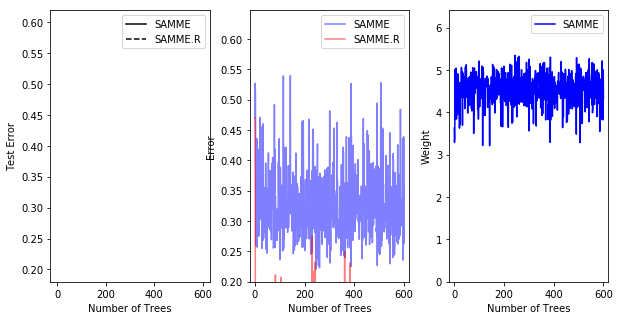

In [31]:
from sklearn.externals.six.moves import zip

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

datafile='playlist_data_21oct_withoutdups.csv'
df=pd.read_csv(datafile,sep='|')

tmp_X = df.iloc[:,4:18]
tmp_y = df.iloc[:,18:19]
tmp_y['playlist'] = tmp_y['playlist'].astype('category')
tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
X=scaler.fit_transform(tmp_X)
y=np.ravel(tmp_y['playlist_codes'])

n_split = 6000

X_train, X_test = X[:n_split], X[n_split:]
y_train, y_test = y[:n_split], y[n_split:]
clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=14, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
bdt_real = AdaBoostClassifier(
    clf,
    n_estimators=600,
    learning_rate=1)

bdt_discrete = AdaBoostClassifier(
    clf,
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)

real_test_errors = []
discrete_test_errors = []

for real_test_predict, discrete_train_predict in zip(
        bdt_real.staged_predict(X_test), bdt_discrete.staged_predict(X_test)):
    real_test_errors.append(
        1. - accuracy_score(real_test_predict, y_test))
    discrete_test_errors.append(
        1. - accuracy_score(discrete_train_predict, y_test))

n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]
print("real_estimator_errors: ", real_estimator_errors)
print("real_test_errors: ", real_test_errors)
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1),
         discrete_test_errors, c='black', label='SAMME')
plt.plot(range(1, n_trees_real + 1),
         real_test_errors, c='black',
         linestyle='dashed', label='SAMME.R')
plt.legend()
plt.ylim(0.18, 0.62)
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')

plt.subplot(132)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
         "b", label='SAMME', alpha=.5)
plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
         "r", label='SAMME.R', alpha=.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
         "b", label='SAMME')
plt.legend()
plt.ylabel('Weight')
plt.xlabel('Number of Trees')
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
datafile='playlist_data_21oct_withoutdups.csv'
df=pd.read_csv(datafile,sep='|')

tmp_X = df.iloc[:,4:18]
tmp_y = df.iloc[:,18:19]
tmp_y['playlist'] = tmp_y['playlist'].astype('category')
tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
X=scaler.fit_transform(tmp_X)
y=np.ravel(tmp_y['playlist_codes'])

n_split = 6000

X_train, X_test = X[:n_split], X[n_split:]
y_train, y_test = y[:n_split], y[n_split:]

param_grid = {'max_depth': np.arange(3, 30), 'min_samples_split': np.arange(2, 30), 'min_samples_leaf': np.arange(1, 30),
             'max_features':["auto", "sqrt", "log2", None], 'class_weight':['balanced', None] }

# prepare a range of alpha values to test

# create and fit a ridge regression model, testing each alpha
model = DecisionTreeClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_)


In [35]:
from sklearn.metrics import classification_report
datafile="playlist_data_21oct_withoutdups.csv"
df=pd.read_csv(datafile,sep='|')

tmp_X = df.iloc[:,4:18]
tmp_y = df.iloc[:,18:19]
tmp_y['playlist'] = tmp_y['playlist'].astype('category')
tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
X=scaler.fit_transform(tmp_X)
y=np.ravel(tmp_y['playlist_codes'])

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


param_grid = {'n_estimators':[100, 200, 300, 400, 500, 600], 'learning_rate':[0.01, 0.05, 0.1, 0.5, 1, 1.5, 2]}

# prepare a range of alpha values to test

# create and fit a ridge regression model, testing each alpha
tree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=14, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
model = AdaBoostClassifier(tree)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_)

KeyboardInterrupt: 